## Logistic Regression
### 3. Compare the trajectory of gradient descent (batch) with both cross entropy loss and least mean square loss

<ipython-input-106-97051e863a9d>:76: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))
<ipython-input-106-97051e863a9d>:77: RuntimeWarning: divide by zero encountered in log
  loss_plot[i,j] = -(np.sum(y*np.log(a) + (1-y)*np.log(1-a))) / X.shape[0]+0.000001
<ipython-input-106-97051e863a9d>:77: RuntimeWarning: invalid value encountered in multiply
  loss_plot[i,j] = -(np.sum(y*np.log(a) + (1-y)*np.log(1-a))) / X.shape[0]+0.000001


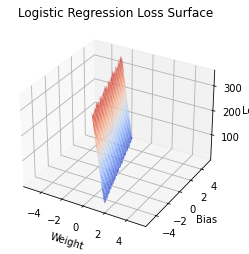

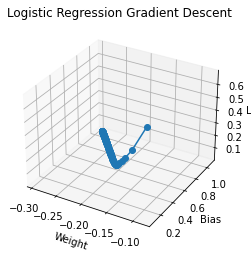

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Generate a dataset of 100 points with two classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z+0.000001))

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    n = len(y_true)
    loss = -(1/n) * np.sum(y_true*np.log(y_pred + 1e-8) + (1-y_true)*np.log(1-y_pred+ 1e-8))
    return loss

# Define logistic regression function with cross-entropy loss
def logistic_regression(X, y, lr=0.05, num_iter=1000):
    # Initialize weights
    w = np.zeros(X.shape[1])
    # Initialize loss and weights lists
    loss_list = []
    W=[]
    w_list = []
    b_list = []
    b=0
    prev_loss = 34
    loss = 0
    # Loop over number of iterations
    for i in range(num_iter):
        # Calculate logits
        z = np.dot(X, w) + b
        # Calculate sigmoid activation
        a = sigmoid(z)
        # Calculate cross-entropy loss
        prev_loss = loss
        loss = cross_entropy_loss(y,a)
        # Calculate gradient
        grad = np.dot(X.T, (a-y)) / X.shape[0]+0.000001
        db = (1/len(y)) * np.sum(a - y)
        # Update weights
        
        w -= lr * grad
        b -= lr * db
        # print(w, b)
        # Append loss, weights, and bias to lists
        loss_list.append(loss)
        W.extend(w)
        # print(W)
        w_list.append(w[1])
        b_list.append(w[0])
        if(abs(prev_loss-loss)<0.0001) :
          break
    size=int(len(W)/2)
    W = np.reshape(W, (size,2))
    return W, w, loss_list, w_list, b_list, b

# Run logistic regression function and get weights, loss, and weights and bias lists
W, w, loss_list, w_list, b_list, b = logistic_regression(X, y)

# Plot the 3D contour of weights and bias vs loss
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
w_plot = np.linspace(-5, 5, 100)
b_plot = np.linspace(-5, 5, 100)
w_plot, b_plot = np.meshgrid(w_plot, b_plot)
loss_plot = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
      # w_temp = np.array([b_plot[i,j], w_plot[i,j]])
        w_temp = np.array(w_plot[i,j])
        # w_temp = w_temp.reshape(-1,1)
        z = np.sum(np.dot(X, w_temp)+ b_plot[i,j])
        a = 1 / (1 + np.exp(-z))
        loss_plot[i,j] = -(np.sum(y*np.log(a) + (1-y)*np.log(1-a))) / X.shape[0]+0.000001
# ax.plot_surface(w_plot, b_plot, loss_plot, cmap='coolwarm')
ax.plot_surface(w_plot, b_plot, loss_plot, cmap='coolwarm')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('Logistic Regression Loss Surface')
plt.show()

# Plot the trajectory of gradient descent in the 3D surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(w_list, b_list, loss_list, marker='o')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('Logistic Regression Gradient Descent')
plt.show()

In [ ]:
def plot(thetas, costs, bias, cost_fn, x, y) :
 
  total_iters = len(thetas) 
  theta = thetas[total_iters-1]
  thetas = np.array(thetas)
  costs = np.array(costs)
  

  x_theta, y_theta = np.meshgrid(np.arange(thetas[:, 0].min()-0.1, thetas[:, 0].max()+0.1, 0.01), np.arange(thetas[:,1].min()-0.1, thetas[:,1].max()+0.1, 0.01))

  theta_grid = np.c_[np.zeros(x_theta.ravel().shape[0]), x_theta.ravel(), y_theta.ravel()]
  for i in range(len(theta_grid)) :
    theta_grid[i][0] = bias
  
  
  z_cost = []
  x = np.hstack((np.ones((x.shape[0], 1)), x))

  for theta_ in theta_grid:
    y_pred = np.dot(x, theta_)
    y_pred = sigmoid(y_pred)
    cost = cost_fn(y, y_pred)
    z_cost.append(cost)
  z_cost = np.array(z_cost).reshape(x_theta.shape)
  fig = plt.figure(figsize=(6,6))

  plot = fig.subplots(1,1)
  
  plot.contourf(x_theta, y_theta, z_cost, cmap=plt.cm.hot,  levels = np.linspace(z_cost.min(), z_cost.max(), 30))
   
  plot.set_xlabel(r'$w_1$')
  plot.set_ylabel(r'$w_2$')
  plot.set_title('Batch Gradient Descent w.r.t ' + r'$\alpha$'+' in Contours of Cost Function')
  for [_x, _y] in thetas:
    plot.scatter(_x, _y, c='grey', s=25)
        
  plt.show()
  


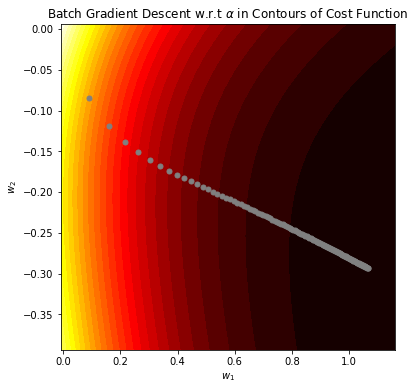

In [ ]:
plot(W, loss_list, b, cross_entropy_loss, X, y)

<ipython-input-109-e7a178f839fe>:65: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


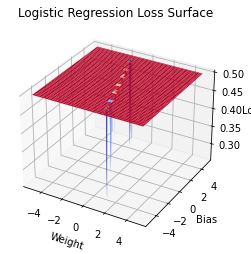

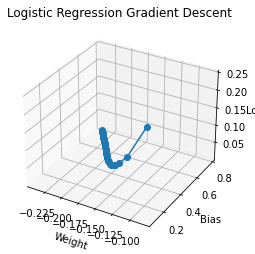

In [ ]:

# Define the mean square loss function
def least_mean_square_loss(y_true, y_pred):
    n_samples = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n_samples
    return mse

# Define logistic regression function with cross-entropy loss
def logistic_regression_mse(X, y, lr=0.05, num_iter=1000):
    # Initialize weights
    w = np.zeros(X.shape[1])
    # Initialize loss and weights lists
    loss_list = []
    W=[]
    w_list = []
    b_list = []
    b=0
    prev_loss = 34
    loss = 0
    # Loop over number of iterations
    for i in range(num_iter):
        # Calculate logits
        z = np.dot(X, w) + b
        # Calculate sigmoid activation
        a = sigmoid(z)
        # Calculate cross-entropy loss
        # loss = -(np.sum(y*np.log(a) + (1-y)*np.log(1-a))) / X.shape[0]
        prev_loss = loss
        loss = least_mean_square_loss(y,a)
        # Calculate gradient
        grad = np.dot(X.T, (a-y)) / X.shape[0]+0.000001
        db = (1/len(y)) * np.sum(a - y)
        # Update weights
        
        w -= lr * grad
        b -= lr * db
        # print(w, b)
        # Append loss, weights, and bias to lists
        loss_list.append(loss)
        W.extend(w)
        # print(W)
        w_list.append(w[1])
        b_list.append(w[0])
        if(abs(prev_loss-loss)<0.0001) :
          break
    size=int(len(W)/2)
    W = np.reshape(W, (size,2))
    return W, w, loss_list, w_list, b_list, b

# Run logistic regression function and get weights, loss, and weights and bias lists
W_mse, w_mse, loss_list_mse, w_list_mse, b_list_mse, b_mse = logistic_regression_mse(X, y)
# print(W)
# Plot the 3D contour of weights and bias vs loss
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
w_plot = np.linspace(-5, 5, 100)
b_plot = np.linspace(-5, 5, 100)
w_plot, b_plot = np.meshgrid(w_plot, b_plot)
loss_plot = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
      # w_temp = np.array([b_plot[i,j], w_plot[i,j]])
        w_temp = np.array(w_plot[i,j])
        # w_temp = w_temp.reshape(-1,1)
        z = np.sum(np.dot(X, w_temp)+ b_plot[i,j])
        a = 1 / (1 + np.exp(-z))
        n_samples = len(y)
        loss_plot[i,j] = np.sum((y - a) ** 2) / n_samples
ax.plot_surface(w_plot, b_plot, loss_plot, cmap='coolwarm')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('Logistic Regression Loss Surface')
plt.show()

# Plot the trajectory of gradient descent in the 3D surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(w_list_mse, b_list_mse, loss_list_mse, marker='o')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('Logistic Regression Gradient Descent')
plt.show()

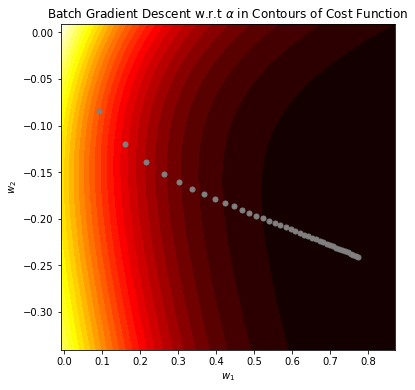

In [ ]:
plot(W_mse, loss_list, b_mse, least_mean_square_loss, X, y)

In [ ]:
def plot2(thetas, costs, bias, cost_fn, x, y) :
  total_iters = len(thetas) 
  theta = thetas[total_iters-1]
  thetas = np.array(thetas)
  costs = np.array(costs)
  
  
  x_theta, y_theta = np.meshgrid(np.arange(thetas[:, 0].min()-10, thetas[:, 0].max()+10, 0.01), np.arange(thetas[:,1].min()-10, thetas[:,1].max()+10, 0.01))
  theta_grid = np.c_[np.zeros(x_theta.ravel().shape[0]), x_theta.ravel(), y_theta.ravel()]
  for i in range(len(theta_grid)) :
    theta_grid[i][0] = bias
  
  
  z_cost = []
  x = np.hstack((np.ones((x.shape[0], 1)), x))

  for theta_ in theta_grid:
    y_pred = np.dot(x, theta_)
    y_pred = sigmoid(y_pred)
    cost = cost_fn(y, y_pred)
    z_cost.append(cost)

  z_cost = np.array(z_cost).reshape(x_theta.shape)
  fig = plt.figure(figsize=(6,6))

  plot = fig.subplots(1,1)
  
  plot.contourf(x_theta, y_theta, z_cost, cmap=plt.cm.hot,  levels = np.linspace(z_cost.min(), z_cost.max(), 30))
   
  plot.set_xlabel(r'$w_1$')
  plot.set_ylabel(r'$w_2$')
  plot.set_title('Batch Gradient Descent w.r.t ' + r'$\alpha$'+' in Contours of Cost Function')
  for [_x, _y] in thetas:
    plot.scatter(_x, _y, c='grey', s=25)
        
  plt.show()
  

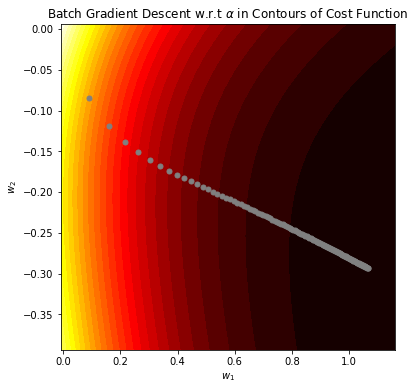

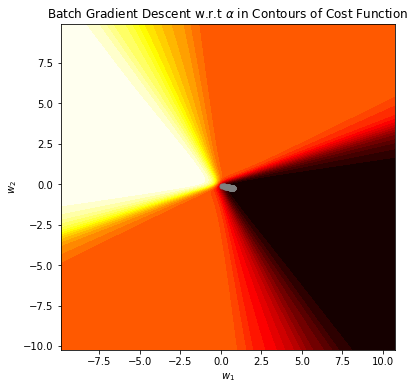

In [ ]:
plot(W, loss_list, b, cross_entropy_loss, X, y)
plot2(W_mse, loss_list, b_mse, least_mean_square_loss, X, y)